In [1]:
import sys 
sys.path.append("..") 

#from topological_models import generator
import numpy as np
from topology_model import NonHermitianHamiltonian, NonHermitianTopologicalModel
import matplotlib.pyplot as plt
from machine_learning import Cluster
from machine_learning import Classifier
from topology_model import sigma_0, sigma_x, sigma_y, sigma_z
from topology_model import Generator
from topology_model import topology_comparator, topology_verifier, obtain_phase_center_and_number

In [2]:
class RM1D(NonHermitianHamiltonian):
    def __init__(self, E_ref=0.):
        super().__init__(E_ref)
        self.parameters = list()
        self.initiate()

    def get_n(self):
        '''
        n*n Hamiltonian
        '''
        return 2

    def get_n_dim(self):
        return 1

    def get_parameters(self):
        return self.parameters

    def set_parameters(self, **kwargs):
        self.parameters = kwargs['t1'], kwargs['t2'], kwargs['lda'], kwargs['mu'], kwargs['gamma']

    def get_kpoints(self):
        n_points = 11
        kpoints = [[k] for k in np.linspace(0,np.pi,n_points)] + [[k] for k in np.linspace(0,-np.pi,n_points)]

        return kpoints

    def initiate(self):
        t1 = 2.
        t2 = 1.
        lda = 3*np.random.random()
        mu = 1.
        gamma = 2.
        self.parameters = t1, t2, lda, mu, gamma 

    def get_Hamiltonian(self, k):
        k = k[0]
        hk = sigma_0
        t1, t2, lda, mu, gamma = self.parameters

        hk = (t1+t2*np.cos(k))*sigma_x + t2*np.sin(k)*sigma_y + lda*np.sin(k)*sigma_z + (mu+1j*gamma)*sigma_z
        hk = hk - sigma_0*self.E_ref
        return hk

In [3]:
gap_type="point"
E_ref = 0.
hamiltonian_model = RM1D(E_ref=E_ref)
generator = Generator(hamiltonian=hamiltonian_model, gap_type=gap_type)

n_sample = 100
models, vs = generator.generate_models(n_sample)
Qs, vs = generator.generate(n_sample)
n = generator.get_n()

In [4]:
cluster = Cluster(similarity_function=topology_comparator, verbose=False)
center_indices, group_number = cluster.fit(models)
print(group_number)
print("The number of centers: ", len(center_indices))

[68 32]
The number of centers:  2


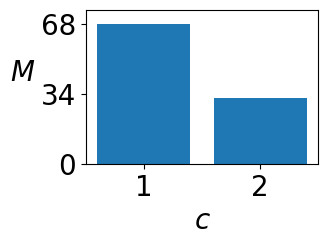

In [5]:
plt.figure(figsize=(3,2))
plt.bar(np.arange(len(group_number))+1, group_number)
plt.xlim([0.5,len(group_number)+0.5])
plt.xticks(list(range(1,len(group_number)+1)),fontsize=20)
plt.ylim([0, np.max(group_number)*1.1])
plt.yticks([0, int(np.max(group_number)/2), int(np.max(group_number))],fontsize=20)
plt.xlabel(r"$c$",fontsize=20)
plt.ylabel(r"$M$",fontsize=20,rotation=0,horizontalalignment='right')
plt.show()

# Phase diagram

In [6]:
classifier = Classifier(similarity_func=topology_comparator, cluster_centers=[models[index] for index in center_indices])
n1 = 51

t1 = 2.
t2 = 1.
mu = 1.
gamma = 2.
ldas = np.linspace(0.001,3,n1)
v_list = np.zeros(n1)

for i in range(n1):
    hamiltonian = RM1D(E_ref=E_ref)
    hamiltonian.set_parameters(t1 = 2., t2 = 1., lda = ldas[i], mu = 1., gamma = 2.)
    #print(hamiltonian.get_parameters())
    _model = NonHermitianTopologicalModel(hamiltonian=hamiltonian, gap_type=gap_type)
    v_list[i] = classifier.classify(_model)

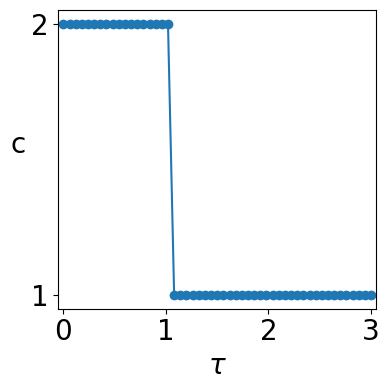

In [9]:
plt.figure(figsize=(4,4))
plt.plot(ldas, v_list,'-o')
plt.xticks([0, 1, 2, 3],fontsize=20)
plt.yticks(range(1, len(group_number)+1),fontsize=20)
plt.xlim([-0.05, 3.05])
plt.ylim([1-0.05,len(group_number)+.05])
plt.xlabel(r"$\tau$",fontsize=20)
plt.ylabel(r"c",fontsize=20,rotation=0,horizontalalignment='right')

plt.tight_layout()
plt.show()

# Save data

In [8]:
from tools import save_data, save_data_M

name = "1D_RM"
save_data(center_indices, group_number, "fig2_{0}_group_number.h5".format(name))
save_data_M(v_list, "fig2_{0}_phase_diagram.h5".format(name))
print(name)

1D_RM
